In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['figure.dpi'] = 120

In [3]:
# retrive data for Apple for last 1 year
df = yf.download("AAPL", period="1y", auto_adjust=True, progress=False)

In [4]:
df.head()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2024-09-19,227.809753,228.755365,223.589405,223.947738,66781300
2024-09-20,227.142868,232.010215,226.565553,228.904673,318679900
2024-09-23,225.420883,228.387074,224.763937,226.286848,54146000
2024-09-24,226.316727,228.287565,224.684324,227.590796,43556100
2024-09-25,225.321335,226.237071,222.982230,223.888003,42308700


In [5]:
df.columns = df.columns.droplevel('Ticker')

In [6]:
df.head()

Price,Close,High,Low,Open,Volume
Date,,,,,
2024-09-19,227.809753,228.755365,223.589405,223.947738,66781300
2024-09-20,227.142868,232.010215,226.565553,228.904673,318679900
2024-09-23,225.420883,228.387074,224.763937,226.286848,54146000
2024-09-24,226.316727,228.287565,224.684324,227.590796,43556100
2024-09-25,225.321335,226.237071,222.982230,223.888003,42308700


In [7]:
df.head()

Price,Close,High,Low,Open,Volume
Date,,,,,
2024-09-19,227.809753,228.755365,223.589405,223.947738,66781300
2024-09-20,227.142868,232.010215,226.565553,228.904673,318679900
2024-09-23,225.420883,228.387074,224.763937,226.286848,54146000
2024-09-24,226.316727,228.287565,224.684324,227.590796,43556100
2024-09-25,225.321335,226.237071,222.982230,223.888003,42308700


In [8]:
df.columns

Index(['Close', 'High', 'Low', 'Open', 'Volume'], dtype='object', name='Price')

In [9]:
df.columns.name

'Price'

In [10]:
df.columns.name = None

In [11]:
df.head()

,Close,High,Low,Open,Volume
Date,,,,,
2024-09-19,227.809753,228.755365,223.589405,223.947738,66781300
2024-09-20,227.142868,232.010215,226.565553,228.904673,318679900
2024-09-23,225.420883,228.387074,224.763937,226.286848,54146000
2024-09-24,226.316727,228.287565,224.684324,227.590796,43556100
2024-09-25,225.321335,226.237071,222.982230,223.888003,42308700


In [12]:
price = df[['Close']].astype(float).sort_index()

In [13]:
price.head()

,Close
Date,
2024-09-19,227.809753
2024-09-20,227.142868
2024-09-23,225.420883
2024-09-24,226.316727
2024-09-25,225.321335


In [14]:
returns = price.pct_change().dropna()

In [15]:
returns.head()

,Close
Date,
2024-09-20,-0.002927
2024-09-23,-0.007581
2024-09-24,0.003974
2024-09-25,-0.004398
2024-09-26,0.005080


In [16]:
sma20 = price.rolling(20).mean()
sma50 = price.rolling(50).mean()

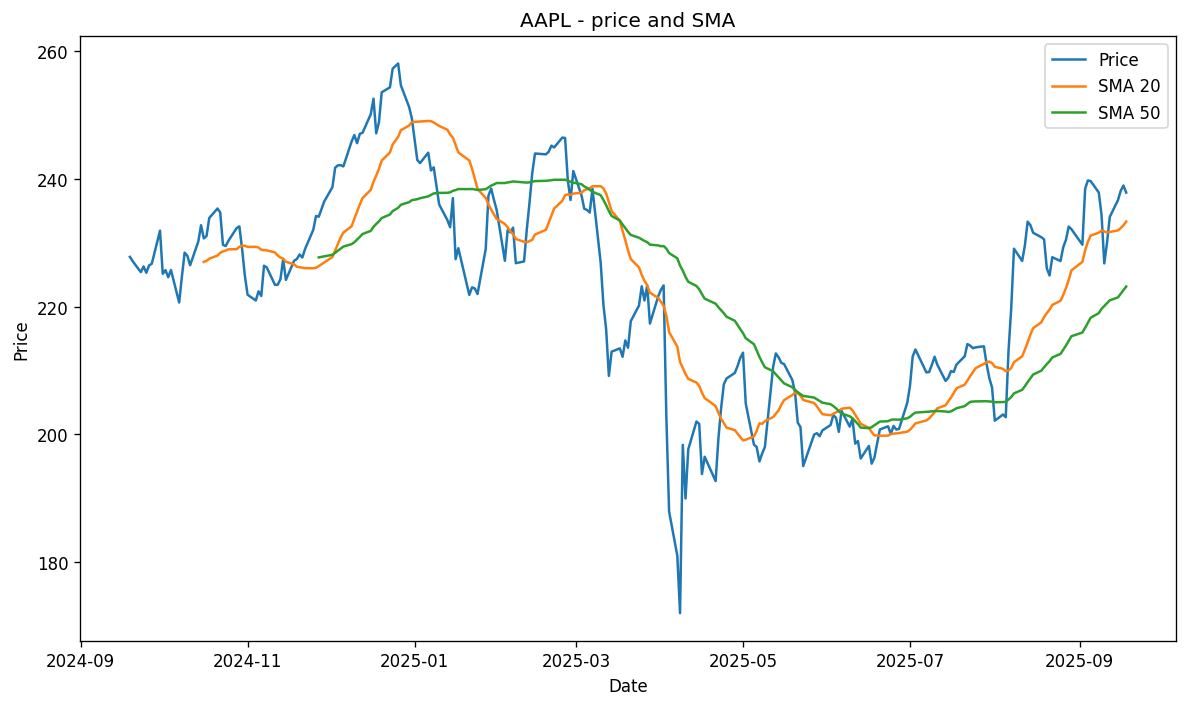

In [17]:
plt.figure()
plt.plot(price.index, price, label='Price')
plt.plot(sma20.index, sma20, label='SMA 20')
plt.plot(sma50.index, sma50, label='SMA 50')
plt.title("AAPL - price and SMA")
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.tight_layout()
plt.show()

<Figure size 1200x720 with 0 Axes>

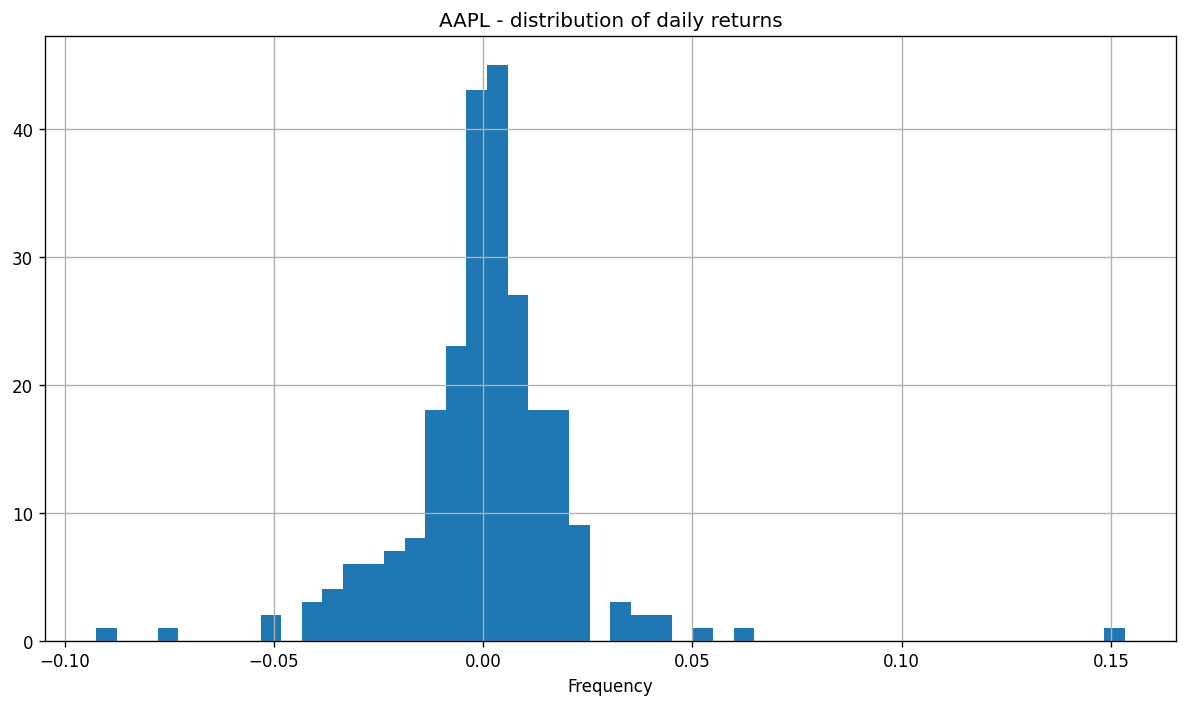

In [18]:
plt.figure()
returns.hist(bins=50)
plt.title('AAPL - distribution of daily returns')
plt.xlabel('Daily return')
plt.xlabel('Frequency')
plt.tight_layout()
plt.show()

##### Histogram above shows the distribution of AAPL's daily returns over the past year (2024/09 - 2025/09) with most days clustered around small changes near 0%

In [19]:
import numpy as np

In [20]:
mean_return = returns.mean()
volatility = returns.std()
ann_volatility = volatility * np.sqrt(252) # annual volatility (252 trading days)


In [21]:
cum_return = (1 + returns).prod() - 1

In [22]:
print("Average daily return:", mean_return )
print("Daily volatility (std):", volatility )
print("Annualized volatility:", ann_volatility )
print("Cumulative return:", cum_return )

Average daily return: Close    0.000376
dtype: float64
Daily volatility (std): Close    0.020289
dtype: float64
Annualized volatility: Close    0.322073
dtype: float64
Cumulative return: Close    0.044205
dtype: float64
